# Seaborn: Introduction level 

Seaborn is a library built on top of the pyplot module in Matplotlib. It provides a high level interface to create a more intuitive feel. This entails using a simpler syntax and more intuitive parameter settings. Additionally, Seaborn includes a more aesthetically pleasing collection of colors, themes and styles. This produces a smoother and more professional looking plot than those created from the pyplot module. This library is especially useful when creating more complex plots where more refined graphics

https://chrisgrannan.medium.com/an-introduction-to-matplotlib-seaborn-and-plotly-53d2e8cf4007

**Loading Needed Modules and data**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


mpg = pd.read_csv("Data_1/mpg.csv")
mpg.rename(columns = {'class': 'class1'}, inplace = True) 
#since class is a function in python
diamonds = pd.read_csv("Data_1/diamonds.csv")

# matplotlib pacakage will still be used for figure size and more.

<hr style="border:1px solid black">
<hr style="border:1px solid black">

# 1. Scatterplot Basics

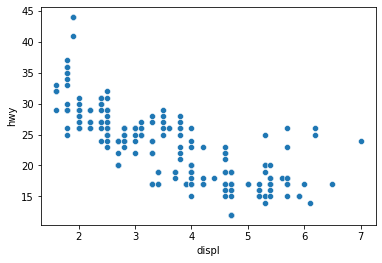

In [4]:
sns.scatterplot(x = "displ", y = 'hwy', data = mpg)

plt.show()

<hr style="border:1px solid black">
<hr style="border:1px solid black">

# 2. Scatterplot Arguments

* **hue** : Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case
* **size**: Grouping variable that will produce points with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.
* **alpha**: blending value, between 0 (transparent) and 1 (opaque).

Click the link [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) for all other arugments for the scatter function.

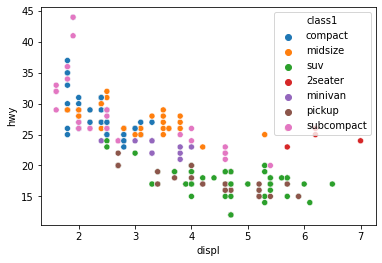

In [5]:
# hue: color mapping
sns.scatterplot(x = "displ", y = 'hwy', hue = 'class1', data = mpg)
plt.show()

<hr style="border:1px solid black">

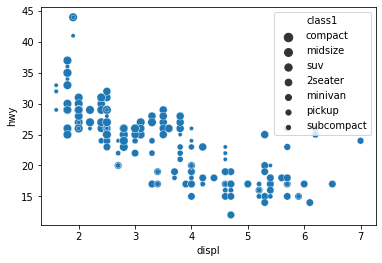

In [6]:
# Size mapping
sns.scatterplot(x = "displ", y = 'hwy', size = 'class1', data = mpg)
plt.show()

<hr style="border:1px solid black">

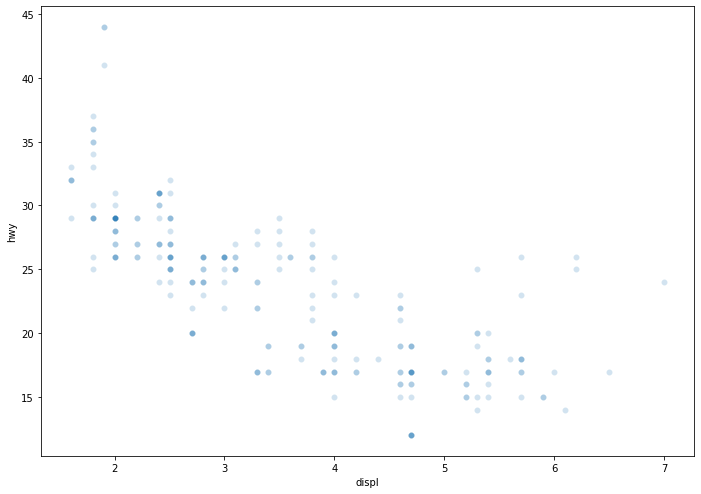

In [7]:
# Alpha mapping
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.scatterplot(x = "displ", y = 'hwy', alpha = 0.2, data = mpg)
plt.show()

<hr style="border:1px solid black">

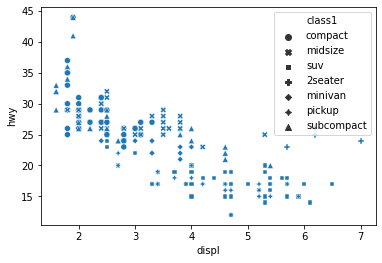

In [8]:
# Style Mappin = Shape in R
fig, ax = plt.subplots()
sns.scatterplot(x = "displ", y = 'hwy', style = 'class1', data = mpg)
plt.show()

<hr style="border:1px solid black">

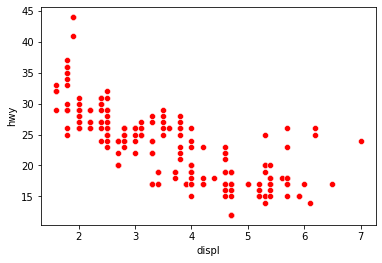

In [9]:
# one color mapping
sns.scatterplot(x = "displ", y = 'hwy', color = 'red', data = mpg)
plt.show()

<hr style="border:1px solid black">
<hr style="border:1px solid black">

# 3. Adding labels and graph title

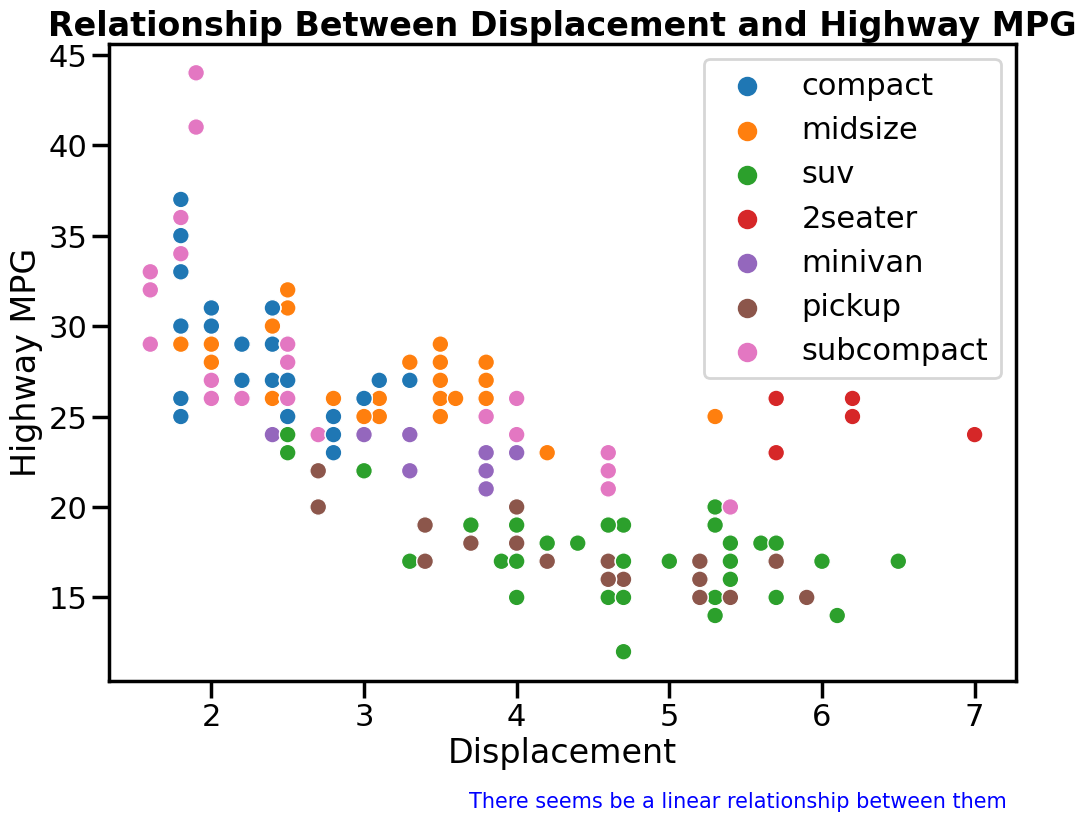

In [10]:
# Same as matplotlib. Note seaborn is built on matplotlib

# If the following is used, then
# plt.style.use('ggplot')

#use the following to get the default setting 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#theme in sns
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(11.7, 8.27))

sns.scatterplot(x = "displ", y = 'hwy', hue='class1', data = mpg)

# Customize the x-axis label
ax.set_xlabel("Displacement")

# Customize the y-axis label
ax.set_ylabel("Highway MPG")

# Add the title
ax.set_title("Relationship Between Displacement and Highway MPG", fontweight="bold")

#ax.text(2, 4, 'It looks like a negative linear relationship', style='italic',
#       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})

#ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
#            arrowprops=dict(facecolor='black', shrink=0.05))
ax.text(0.99, -0.2, 'There seems be a linear relationship between them',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='blue', fontsize=15)


ax.legend()

plt.show()

<hr style="border:1px solid black">

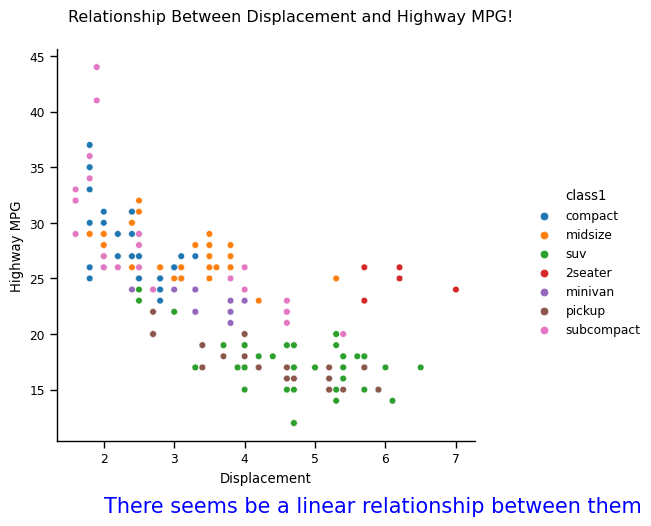

In [11]:
# Labelling for FacetGrid plots

# If the following is used, then
# plt.style.use('ggplot')

#use the following to get the default setting 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#theme in sns
sns.set_context("paper")

g = sns.relplot(x = "displ", y = 'hwy', hue='class1', kind = 'scatter',data = mpg)

# Customize the x-axis label
g.set_xlabels('Displacement') # or g.ax.set_xlabel("Displacement")


# Customize the y-axis label
g.set_ylabels("Highway MPG")  # g.ax.set_ylabel("Highway MPG")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship Between Displacement and Highway MPG!')

# Add Caption
g.ax.text(2,4, 'There seems be a linear relationship between them',
        #horizontalalignment='right',
        #transform=ax.transAxes,
        color='blue', fontsize=15)

plt.show()

<hr style="border:1px solid black">
<hr style="border:1px solid black">

# 4. Facets 

Facets are generally used to visualized relationship between multiple variables. In python we can use `FacetGrid` function or use [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot), [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot), and [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) functions. 

   - **relplot** integrates **{scatterplot(), lineplot()}** and **FacetGrid()**. 
   - **catplot** integrates **categorical plots** and **FacetGrid()**.
   - **lmplot** integrates `regplot()` and **FacetGrid()**


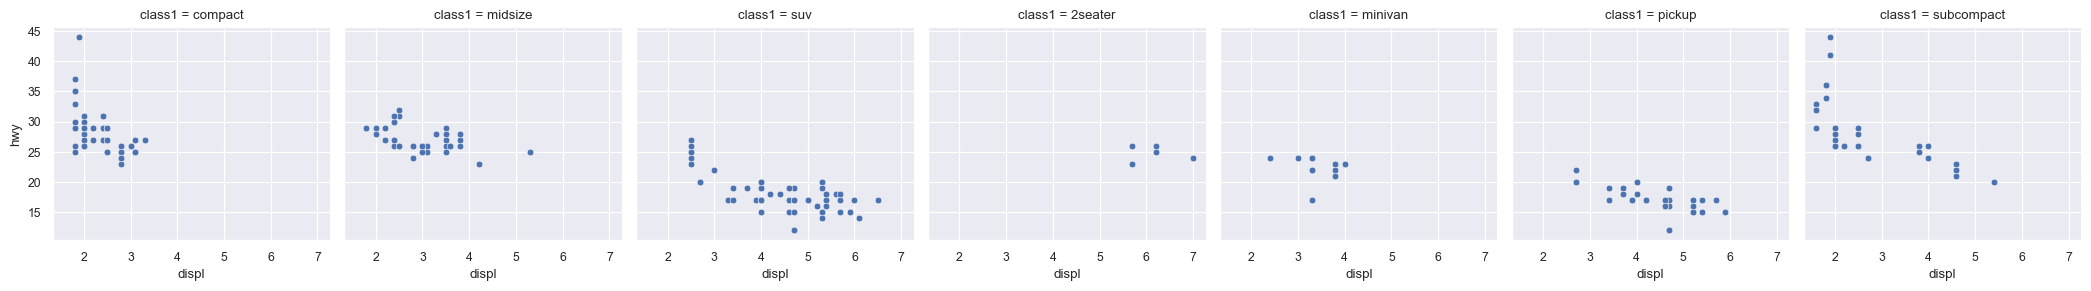

In [14]:
sns.set("paper")

# Method 1 : Using FacetGrid Function in Seaborn
g = sns.FacetGrid(mpg, col="class1", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="displ", y="hwy")

#g.refline(y=mpg["hwy"].median())
plt.show()

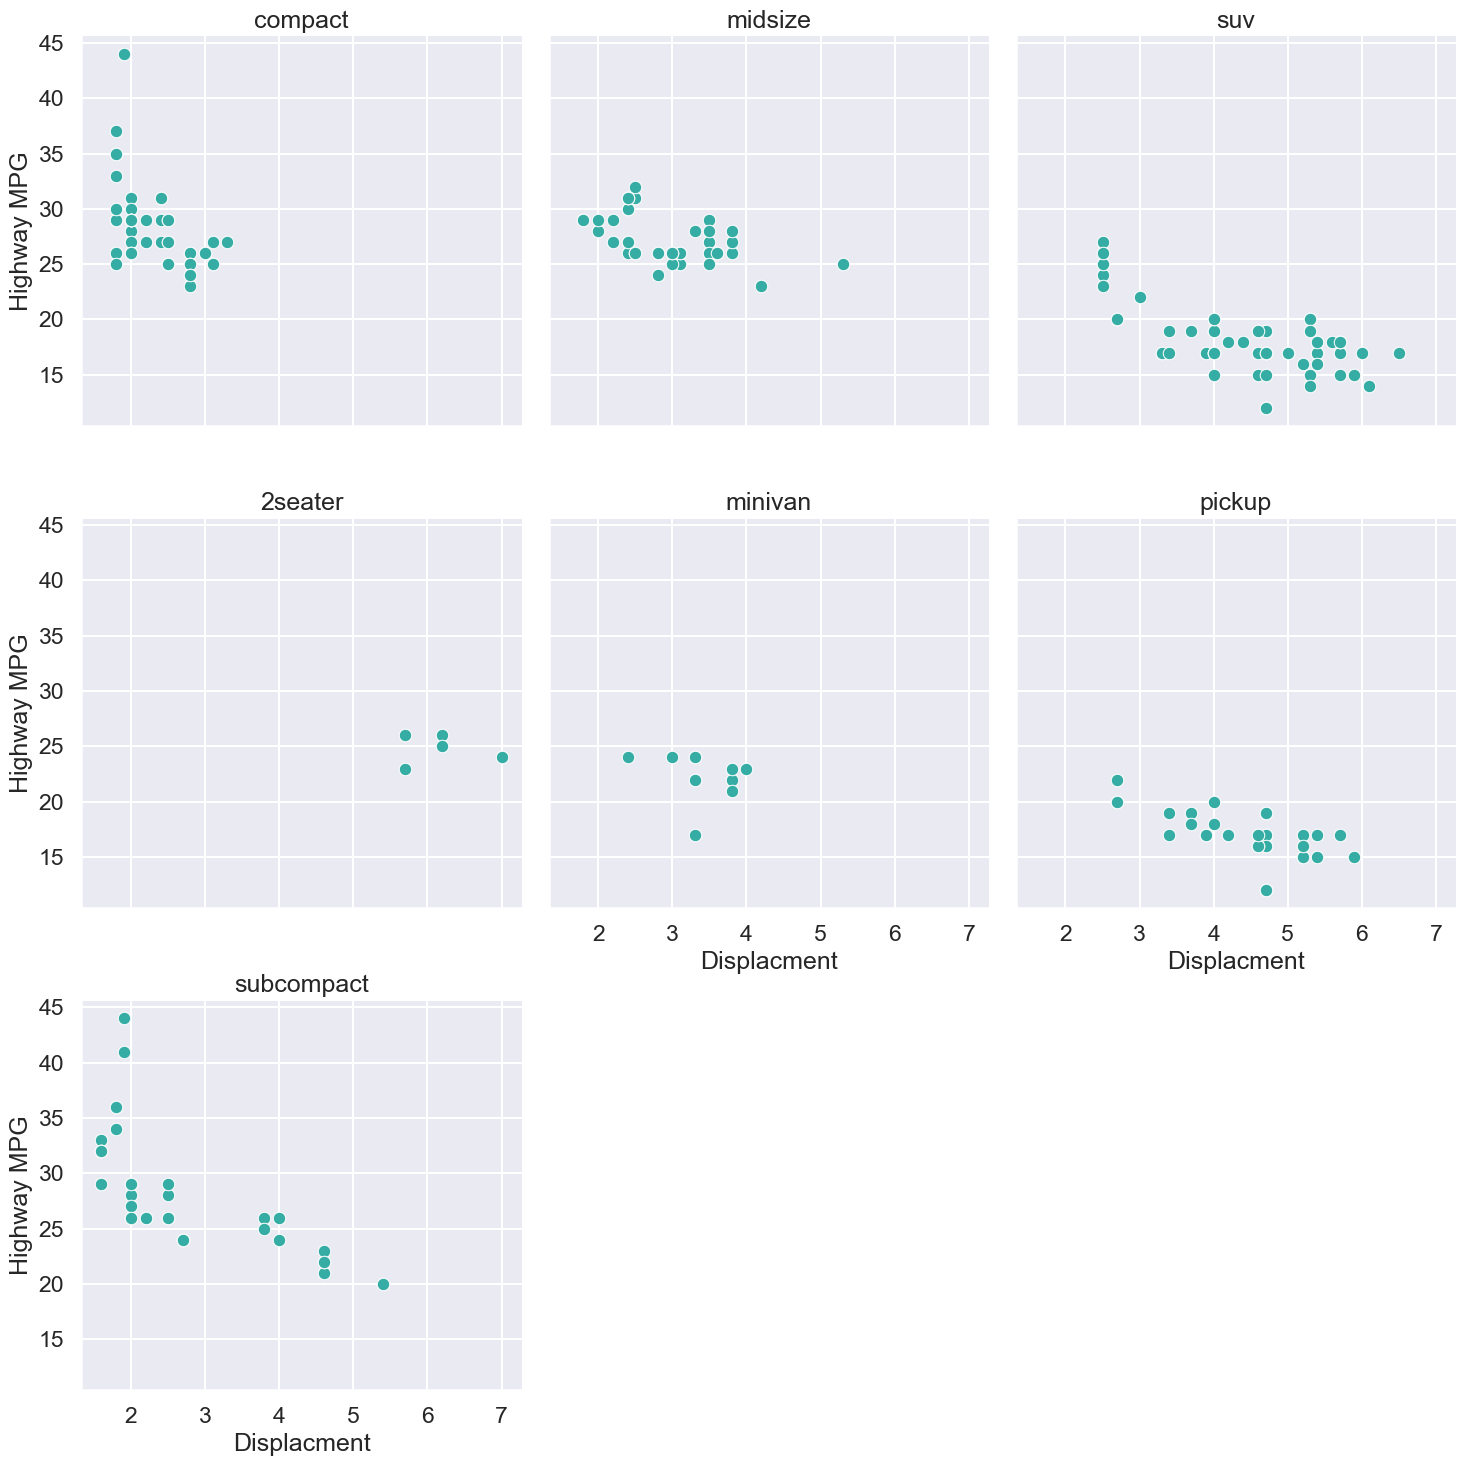

In [15]:
# Method 2: Using relplot and all. It's easier to navigate and edit
sns.set_context("talk")

# Set a custom color palette
sns.set_palette(["#36ADA4"]) # "#39A7D0"
g = sns.relplot(data=mpg, x="displ", y="hwy", col="class1", col_wrap=3, kind='scatter')

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_xlabels('Displacment')
g.set_ylabels('Highway MPG')

plt.show()

<hr style="border:1px solid black">
<hr style="border:1px solid black">

# 5. Type of graphs

We will be using functions that integrates with `FacetGrid()` explained in 4). 

### a) Scatterplot

In [17]:
# Check 1) for basic

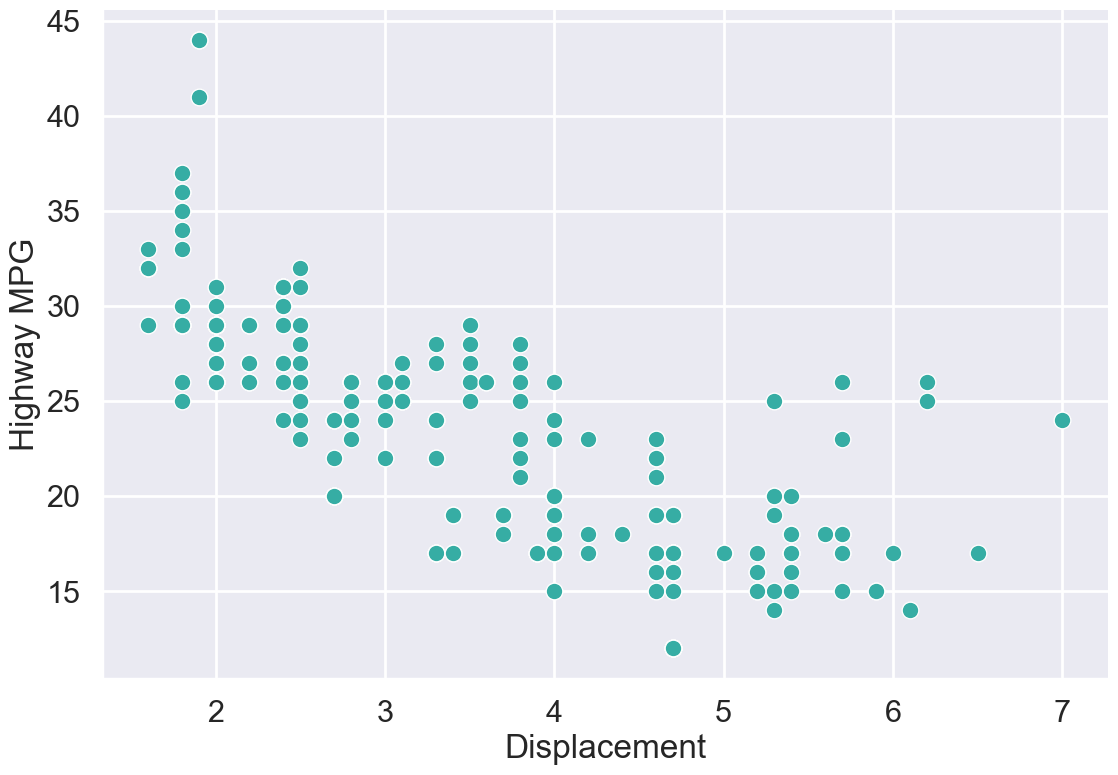

In [16]:
sns.set_context("poster")

g = sns.relplot(x = "displ", y = 'hwy', 
                kind = 'scatter', data = mpg,
               height=8.27, aspect=11.7/8.27)

g.set(xlabel="Displacement",
      ylabel="Highway MPG")

plt.show()

<hr style="border:1px solid black">

**Scatterplot and regression line**

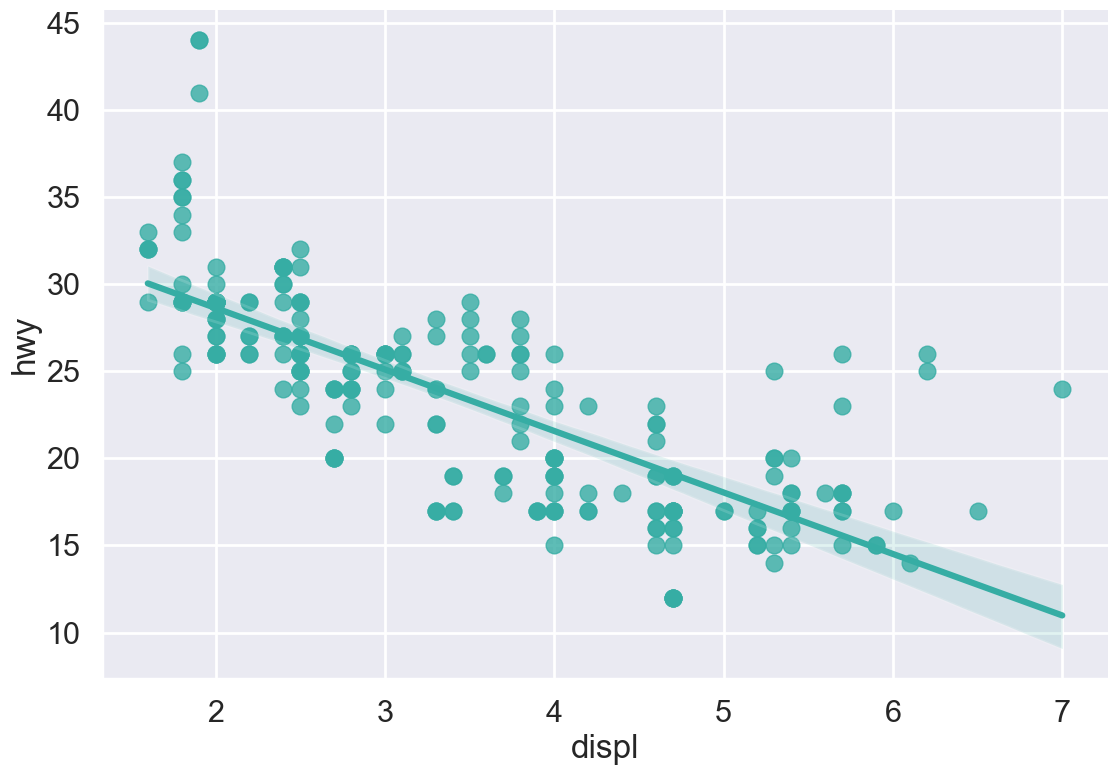

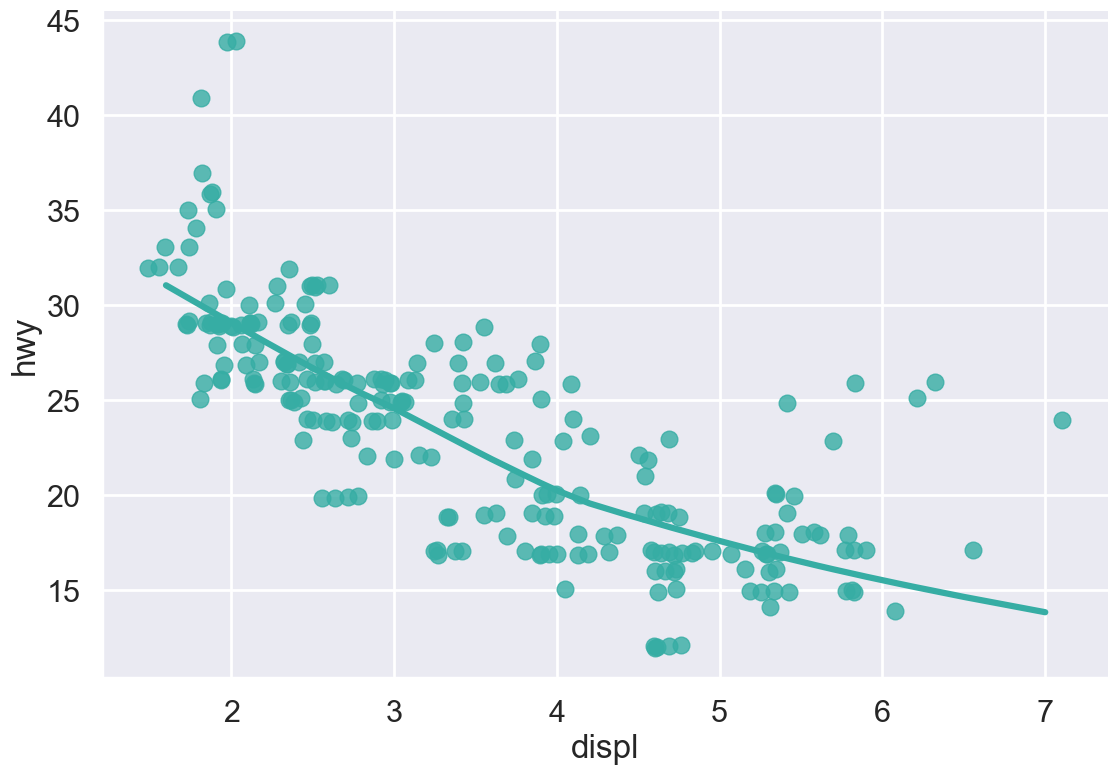

In [19]:
sns.set_context("poster")

# Regression Line
sns.lmplot(x = "displ", y = 'hwy',  data = mpg,
          height=8.27, aspect=11.7/8.27) # Linear Regression

sns.lmplot(x = "displ", y = 'hwy',  data = mpg, 
           lowess = True, x_jitter=0.15, y_jitter = 0.15,
          height=8.27, aspect=11.7/8.27) # Lowess with litter jitters

plt.show()

<hr style="border:1px solid black">

### b)  Histogram

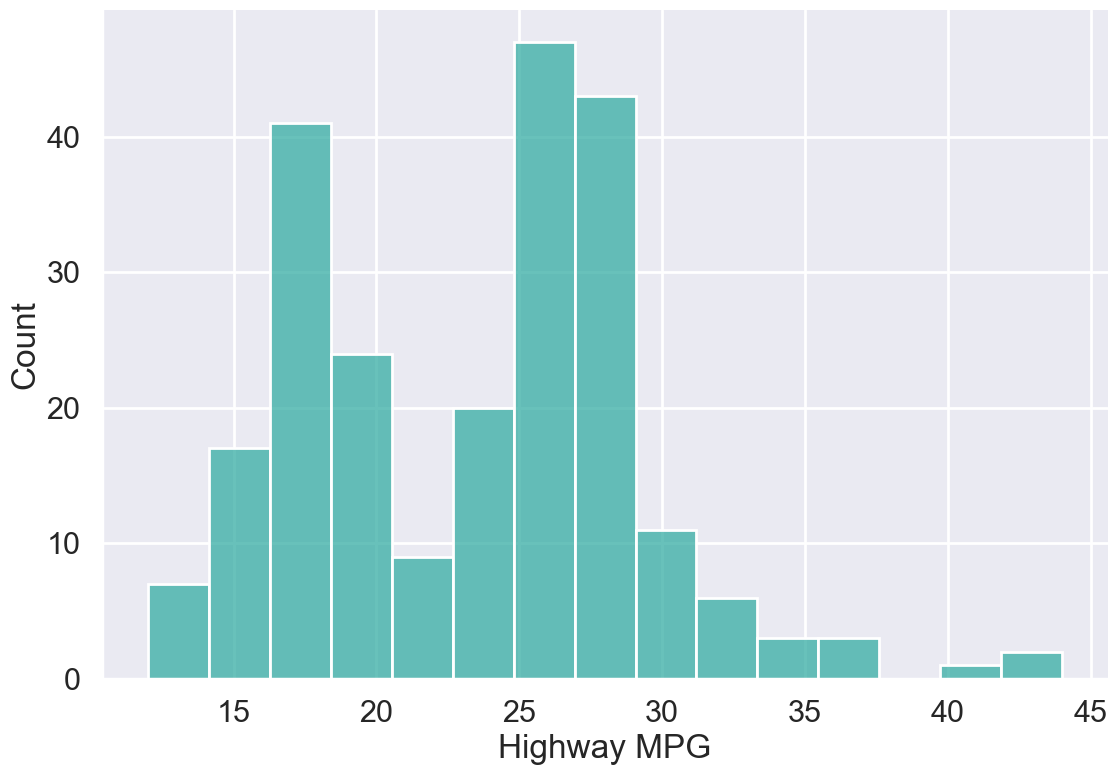

In [20]:
g = sns.displot(x = 'hwy',  data = mpg, kind="hist", bins = 15, height=8.27, aspect=11.7/8.27)
g.set_axis_labels("Highway MPG")
plt.show()

<hr style="border:1px solid black">

### c) Bar Graph

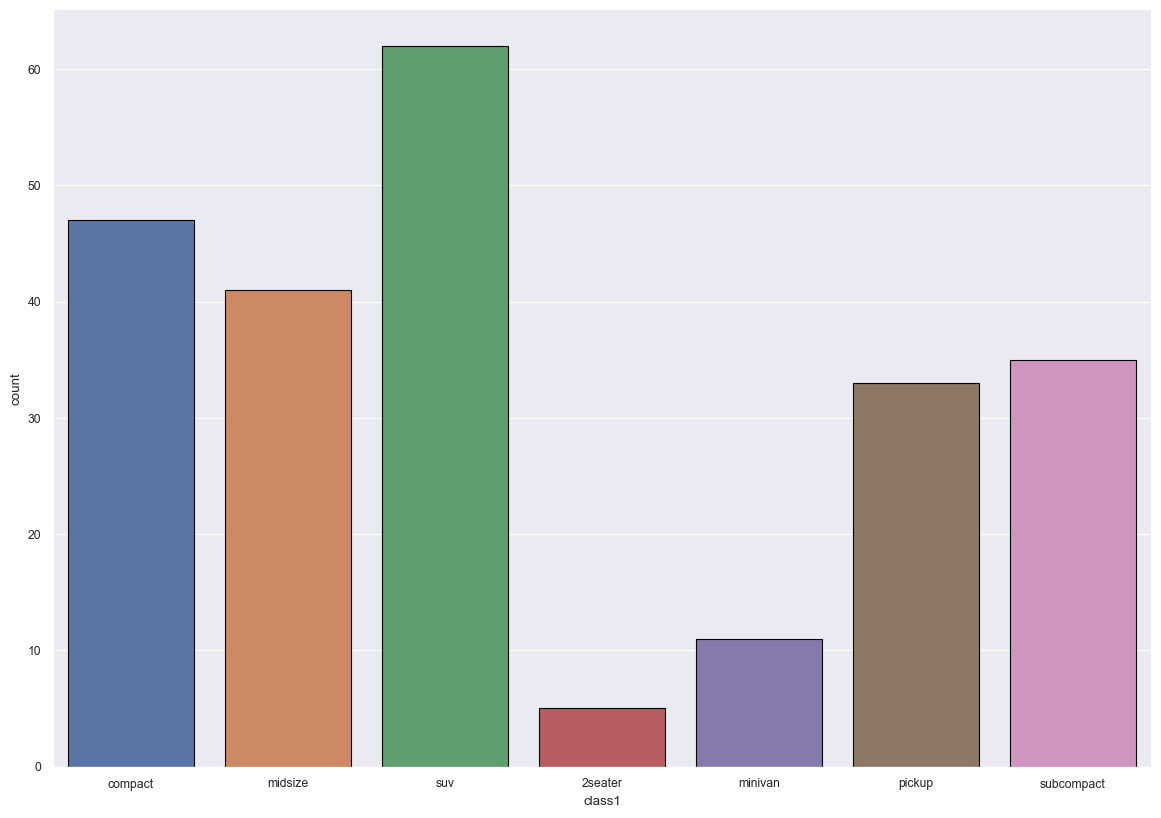

In [21]:
sns.set("paper")
# From raw data
ax = sns.catplot(x = 'class1', data = mpg, 
                 kind = 'count', edgecolor = 'black',
                 height=8.27, aspect=11.7/8.27) # kind = 'bar' requires data and freq()
plt.show()

# plt.setp(ax.patches, linewidth=0) # border for the graph and works ony with countplot

<hr style="border:1px solid black">

### d) Boxplot

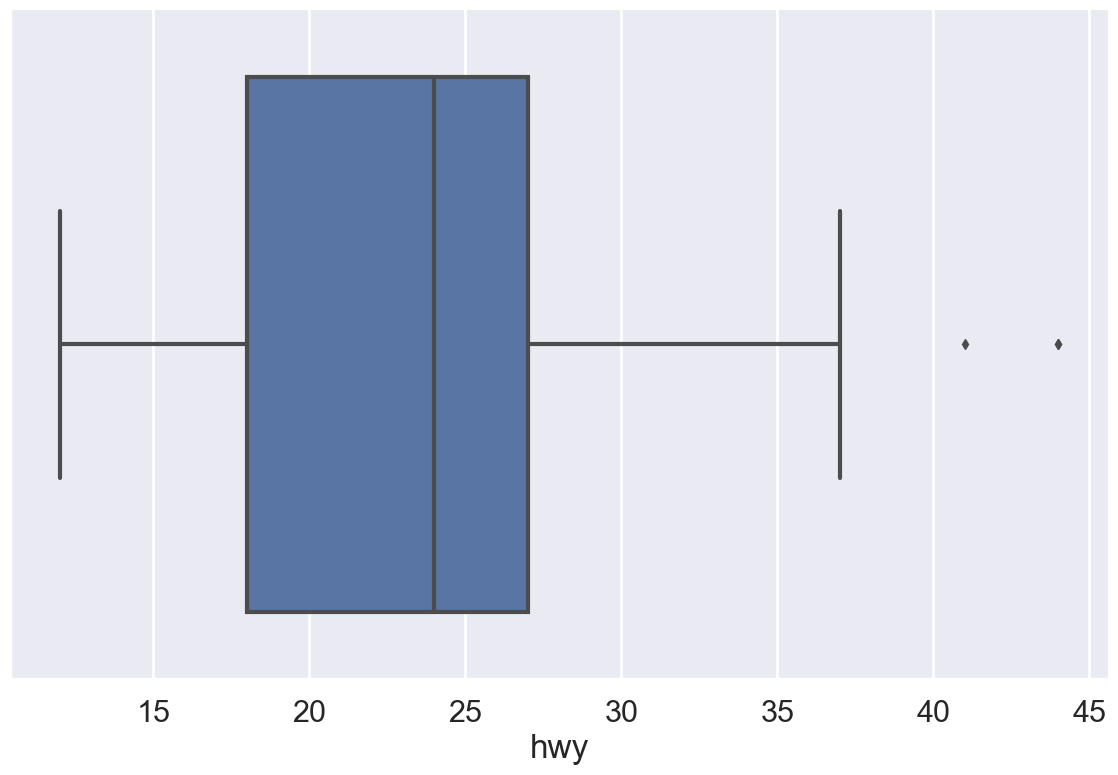

In [22]:
sns.set_context("poster")
sns.catplot(x = "hwy", data = mpg, kind = "box", orient= "h" ,
           height=8.27, aspect=11.7/8.27) 

plt.show()

<hr style="border:1px solid black">

### e) Violin Plot

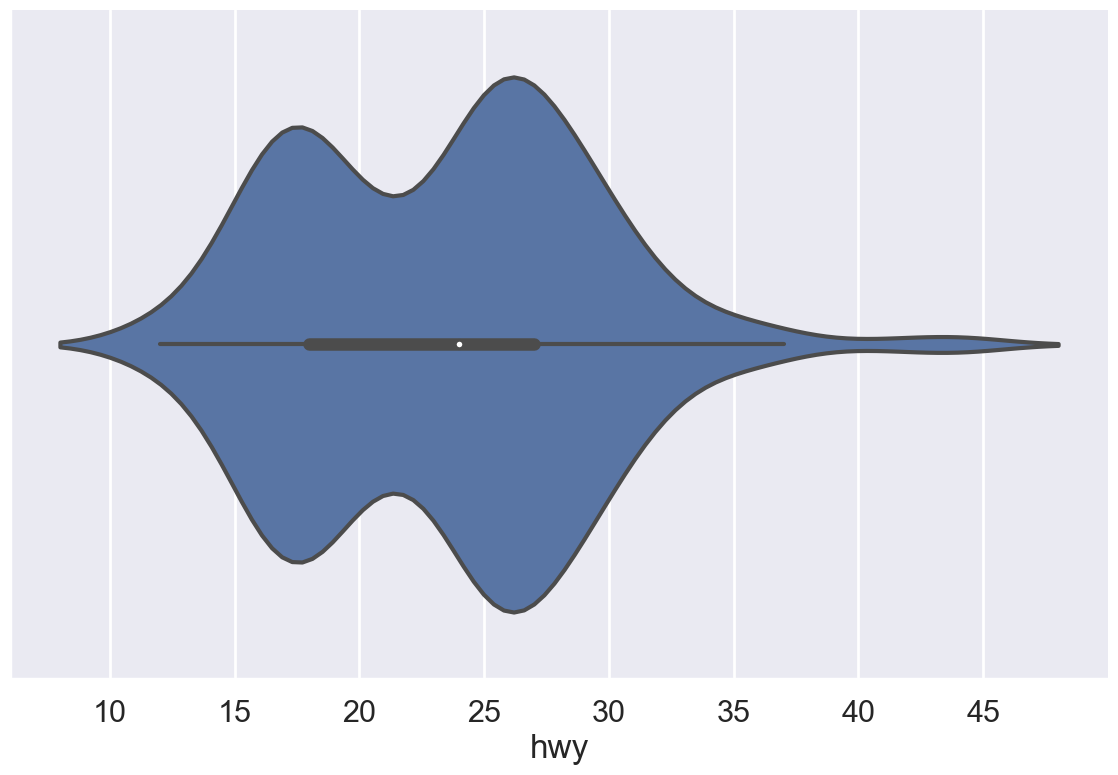

In [23]:
sns.catplot(x = "hwy", data = mpg, kind = "violin", orient= "h" ,
           height=8.27, aspect=11.7/8.27) 

plt.show()

<hr style="border:1px solid black">

### f) Swarm Plot

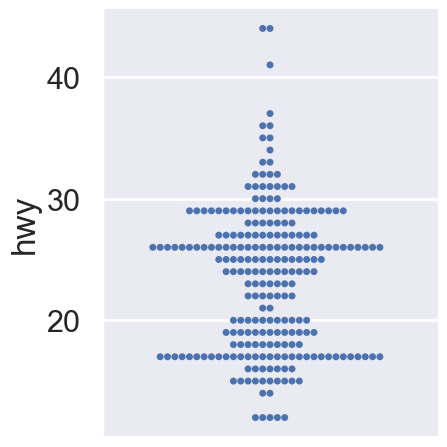

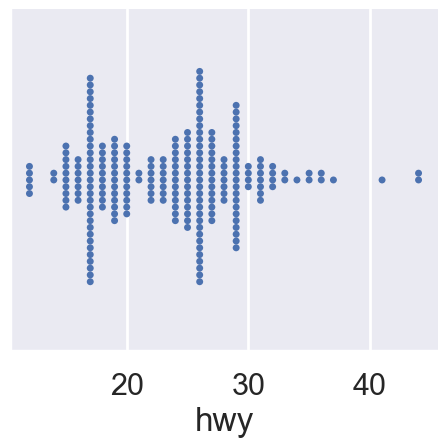

In [24]:
sns.catplot(y = "hwy", data = mpg, kind = "swarm") #Vertical
sns.catplot(x = "hwy", data = mpg, kind = "swarm") #Horizontal

plt.show()

<hr style="border:1px solid black">

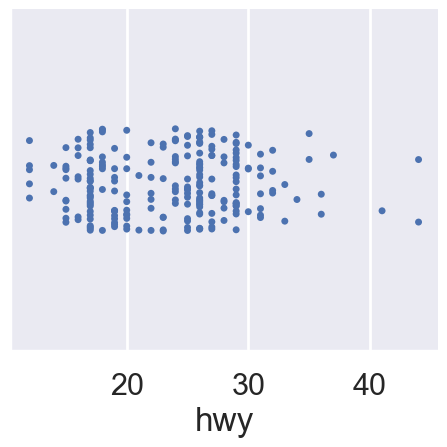

In [25]:
# Strip Plot
sns.catplot(x = "hwy", data = mpg, kind = "strip", jitter=0.15 ) 

plt.show()

<hr style="border:1px solid black">

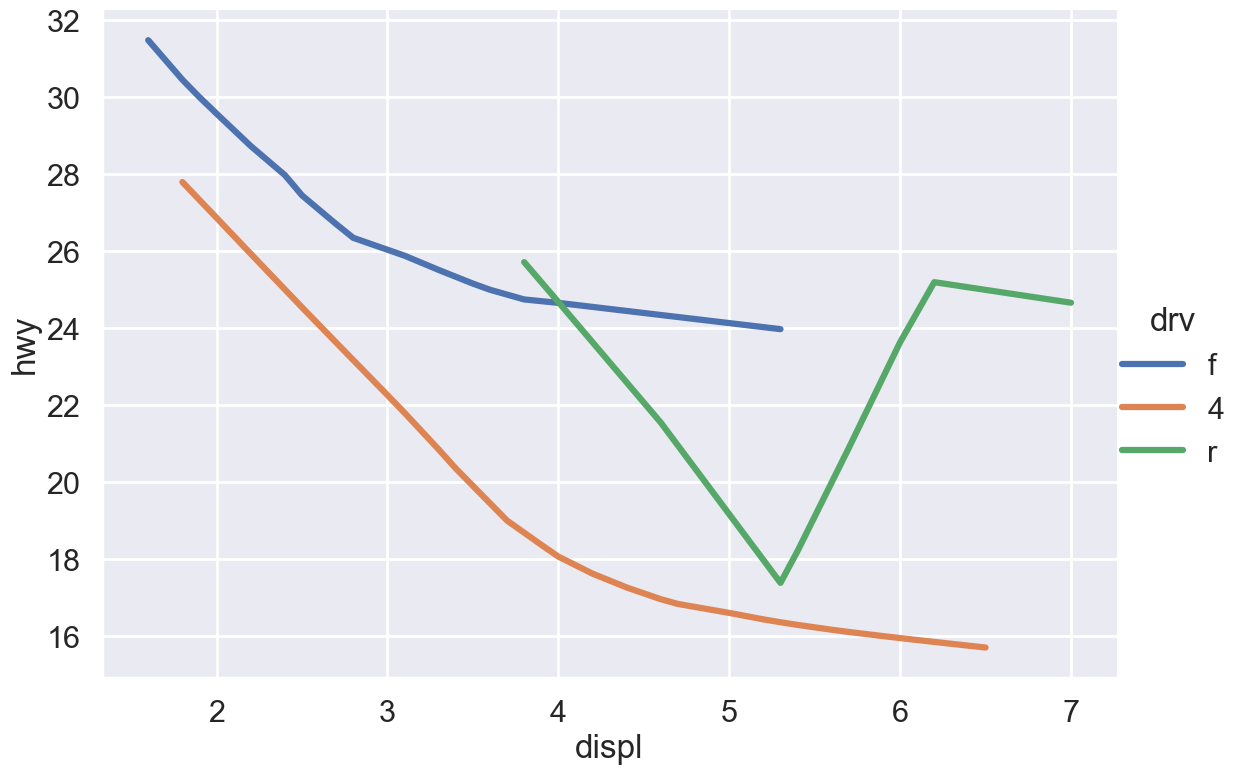

In [24]:
# Linetype
sns.lmplot(x = "displ", y = 'hwy', hue = 'drv', 
           data = mpg, scatter = False,
           lowess = True,
          height=8.27, aspect=11.7/8.27) # Linetype line_kws={"ls":"--"}

plt.show()

<hr style="border:1px solid black">

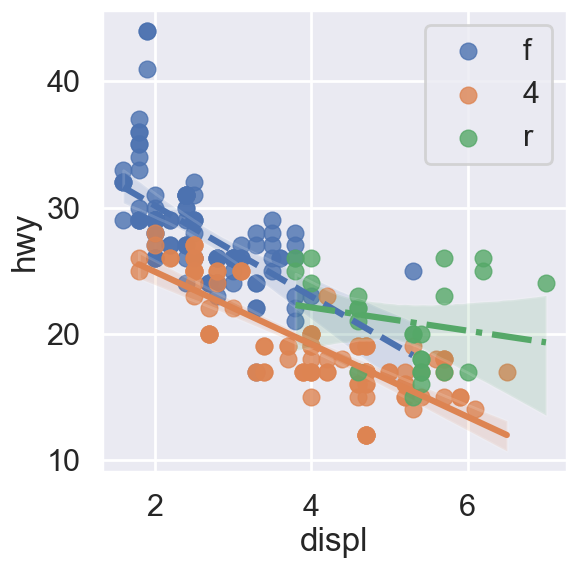

In [25]:
# Changing linestype with regplot instead of lmplot
_, ax = plt.subplots(figsize=(6, 6))
for d, ls in zip(mpg["drv"].unique(), ["--", "-", "-."]):
    sns.regplot(x="displ", y="hwy", 
                data=mpg.loc[mpg.drv == d], line_kws={"ls":ls}, ax=ax, label=d)
plt.legend()
plt.show()


<hr style="border:1px solid black">
<hr style="border:1px solid black">

# 5. Grouped Charts

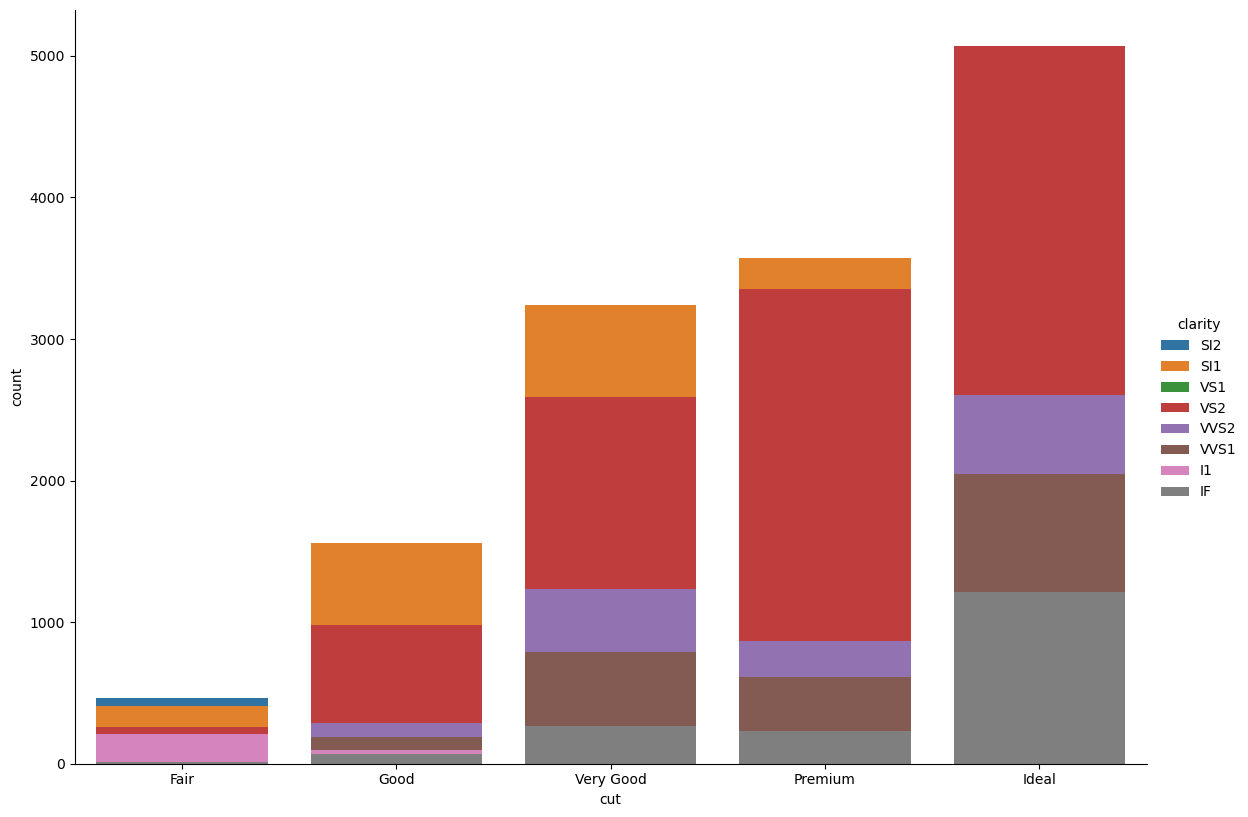

In [27]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Position Identity in R
sns.catplot(x="cut", hue="clarity", data=diamonds, kind = 'count', 
            dodge = False, 
            order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
           height=8.27, aspect=11.7/8.27)
plt.show()

<hr style="border:1px solid black">

### Conditional Distribution

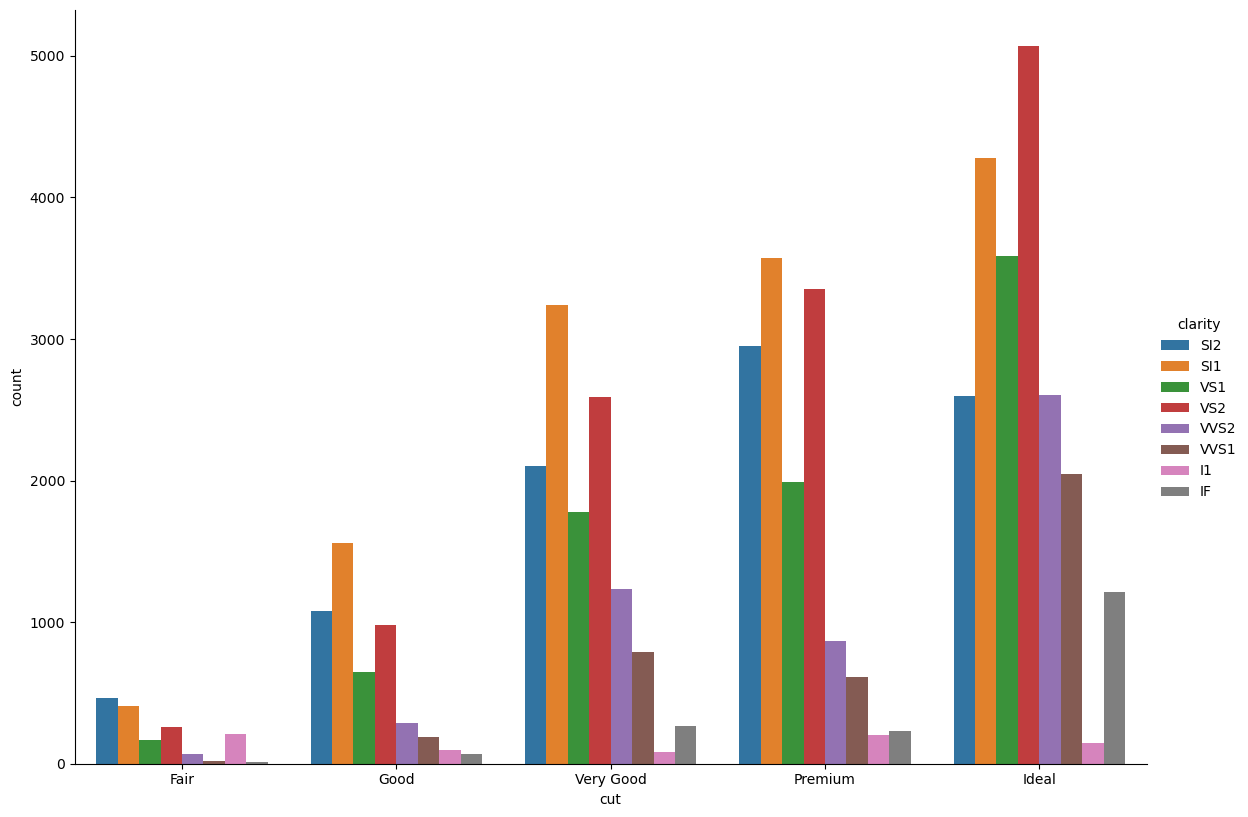

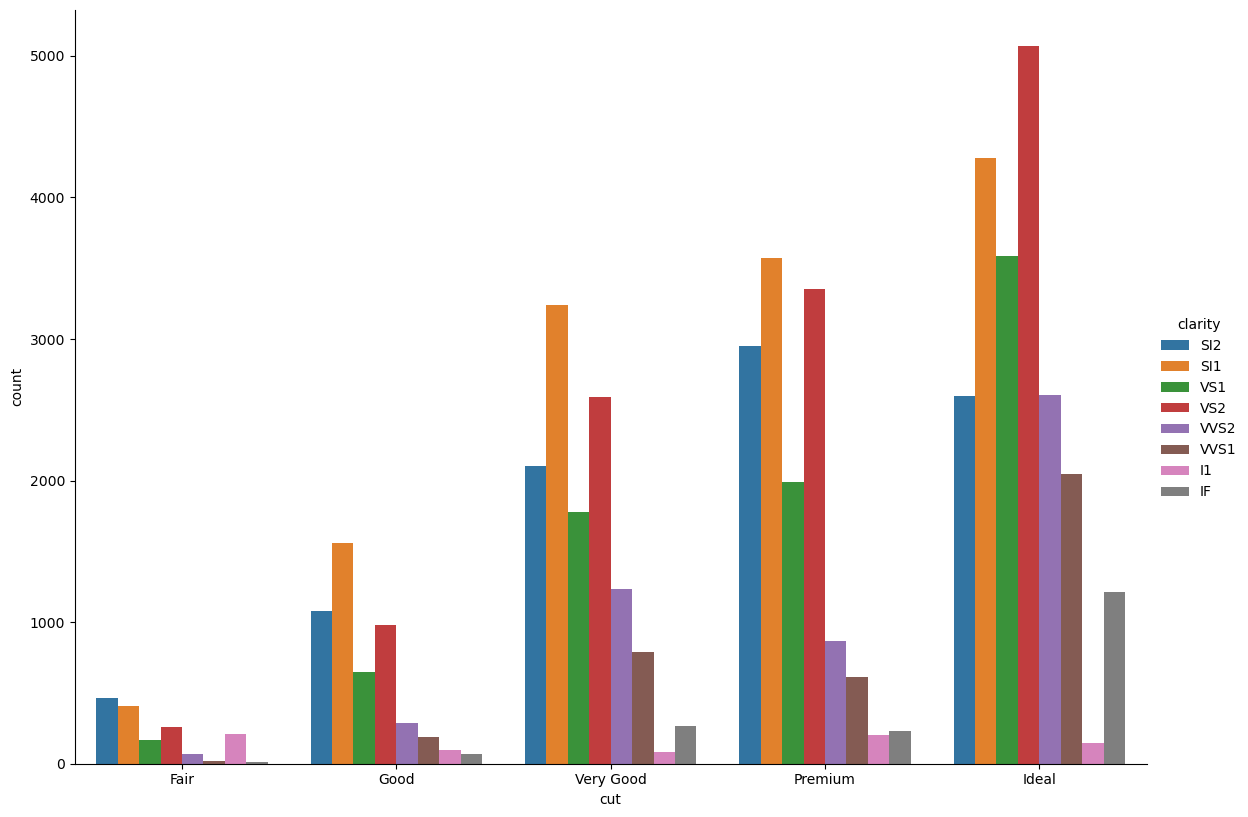

In [29]:
# Position Dodge
#diamonds['cut'].unique()
#['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

#order 
sns.catplot(x="cut", hue="clarity", data=diamonds, kind = 'count', 
            dodge = True, order = diamonds['cut'].value_counts().iloc[::-1].index,
           height=8.27, aspect=11.7/8.27)

#or
sns.catplot(x="cut", hue="clarity", data=diamonds, kind = 'count', 
            dodge = True, order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
           height=8.27, aspect=11.7/8.27)
plt.show()

<hr style="border:1px solid black">

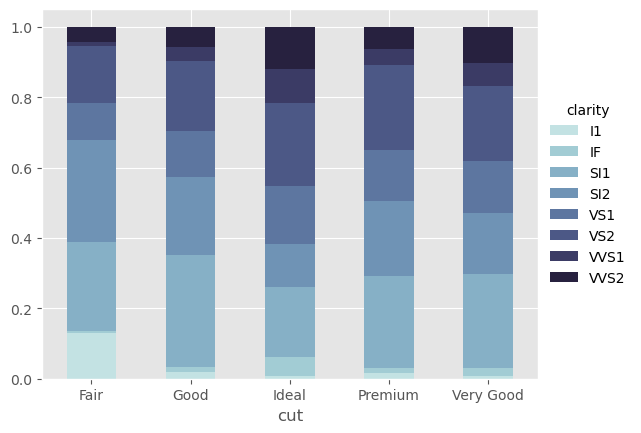

In [30]:
# More complicated than in R
from matplotlib.colors import LinearSegmentedColormap

plt.style.use('ggplot')

# Conditional Distribution
df_new = diamonds[['cut', 'clarity']].pivot_table(columns="cut", 
                                                  index="clarity", 
                                                  aggfunc=len, fill_value=0).T.apply(lambda x: x/sum(x), axis=1)

# Color Map
colors = sns.color_palette("ch:start=.2,rot=-.3", n_colors=len(df_new.columns))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)


# plot
ax = df_new.plot.bar(stacked=True, colormap=cmap1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="clarity", framealpha=0)


plt.show()

<hr style="border:1px solid black">

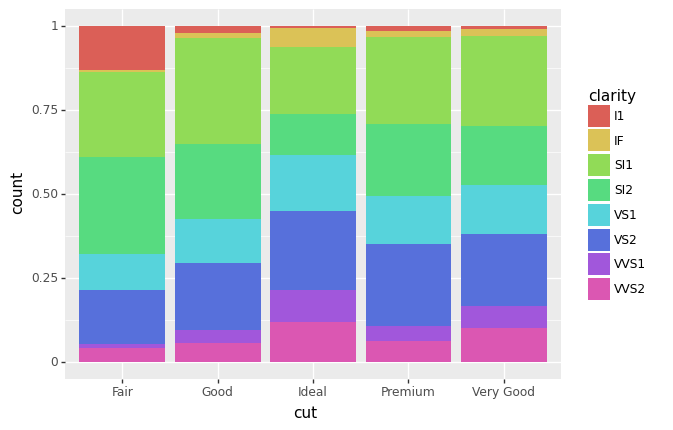

<ggplot: (8776607301536)>

In [31]:
# Using ggplot in Python
# need to download plotnine ("pip install plotnine" in the terminal)
from plotnine import *

(
    ggplot(diamonds) + 
    geom_bar(mapping = aes(x = 'cut', fill = 'clarity'), position = "fill")
)